In [1]:
"""
Q2) Implement AutoEncoder using Numpy on MNIST dataset
Author- Subhra Shankha Bhattacherjee
Roll - EE19MTECH01008
"""

'\nQ2) Implement AutoEncoder using Numpy on MNIST dataset\nAuthor- Subhra Shankha Bhattacherjee\nRoll - EE19MTECH01008\n'

In [2]:
import numpy as np
import matplotlib.pyplot as plt

#important functions
def sigmoid (x):
    return 1/(1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

def error(x,y):
    return np.linalg.norm(x-y)**2

def for_pass(x,w,b):
    return np.dot(x,w)+b

In [3]:
N = 60000 #number of training samples in MNIST
lr = 0.00001 #learning rate
hid_neur = 200 #number of hidden layer nodes
inpt_neur = 196 # (14 x 14)image input nodes, I have used 14x14 imgaes, since i was runnig into memory problem with 28x28 images
opt_neur = inpt_neur  # number of output nodes


X_train = np.load("reshaped_mnist.npy") 
print(X_train.shape)
X = X_train.reshape(N,inpt_neur)
X = X/255.0


#Random initialization of weights and bias ,
# I multiplied with small value because I was having issues with initializing,
# the network was not learning anything

hid_w = 0.001*(np.random.uniform(size=(inpt_neur,hid_neur)))
hid_b = 0.001*(np.random.uniform(size=(1,hid_neur)))
opt_w = 0.001*(np.random.uniform(size=(hid_neur,opt_neur)))
opt_b = 0.001*(np.random.uniform(size=(1,opt_neur)))


(60000, 14, 14)


In [4]:
epochs = 50

#Training algorithm

for i in range(epochs):
  
    loss = 0
    w1 = np.zeros(hid_w.shape)
    b1 = np.zeros(hid_b.shape)
    w2 = np.zeros(opt_w.shape)
    b2 = np.zeros(opt_b.shape)

    #Forward Propagation

    hid = sigmoid(for_pass(X,hid_w,hid_b))
    pred = sigmoid(for_pass(hid,opt_w,opt_b))
    
    #Backpropagation
    
    loss = error(pred,X)
    hid_opt = 2*(pred-X)*sigmoid_derivative(for_pass(hid,opt_w,opt_b))

    err_hid = np.matmul(hid_opt,opt_w.T)
    der_hid = sigmoid_derivative(for_pass(X,hid_w,hid_b))*err_hid
   
    print(loss)
    
    #weight & bias update
    
    hid_w -= np.matmul(X.T,der_hid)*lr
    opt_w -= np.matmul(hid.T,hid_opt)*lr
    hid_b -= np.sum(der_hid,axis=0, keepdims =True).reshape(np.shape(hid_b))*lr
    opt_b -= np.sum(hid_opt, axis = 0, keepdims=True).reshape(np.shape(opt_b))*lr
    

2639185.5598004768
807307.1790937011
777870.0718881352
814197.7259600018
697372.4613846882
706860.5895539685
707507.227922458
681042.1442005059
669911.71689276
659190.1145512932
655009.6590967254
643933.7444554096
636746.2958816899
626395.433287519
619734.2277086792
612834.335832
608053.3937613225
603989.2110516484
600997.0119012804
598588.4616648105
596666.401900313
595070.4254897718
593697.4141976462
592477.8505234113
591358.6230364894
590310.0950200156
589314.860882695
588366.1883806152
587463.1669699147
586607.4430599922
585800.7687308397
585043.5848438169
584334.6307787142
583671.1465278822
583049.3963279267
582465.2055604251
581914.3833225917
581392.9833458384
580897.4308961262
580424.5585278384
579971.5915832275
579536.1111576678
579116.0109026165
578709.4557276021
578314.8455970058
577930.7850008656
577556.0574876195
577189.6042443309
576830.5057226722
576477.9655031936


In [5]:
#testing the model

out_1 = for_pass(X,hid_w,hid_b)
z = sigmoid(out_1)
out_2 = for_pass(z,opt_w,opt_b)
y_pred = sigmoid(out_2)
y_pred = y_pred*255.0

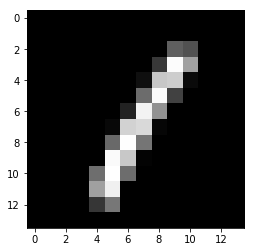

In [6]:
plt.imshow(X[3].reshape(14,14) , cmap='gray')
plt.show()

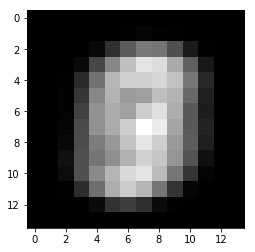

In [7]:
plt.imshow(y_pred[0].reshape(14,14) , cmap='gray' )
plt.show()